[[6.78, 0.000939131205087, 6.78, 0.00101472294773, 7.93, 0.00186478049727, 8.56, 0.00210022975807, 9.35, 0.00228210483328, 10.21, 0.00255863327766, 11.04, 0.00274633988738, 11.79, 0.00291042757453, 12.57, 0.00286096794298, 14.88, 0.000534309692739]]


[[6.78000000e+00 9.39131205e-04 6.78000000e+00 1.01472295e-03
  7.93000000e+00 1.86478050e-03 8.56000000e+00 2.10022976e-03
  9.35000000e+00 2.28210483e-03 1.02100000e+01 2.55863328e-03
  1.10400000e+01 2.74633989e-03 1.17900000e+01 2.91042757e-03
  1.25700000e+01 2.86096794e-03 1.48800000e+01 5.34309693e-04]]


10
[[6.78000000e+00 9.39131205e-04]
 [6.78000000e+00 1.01472295e-03]
 [7.93000000e+00 1.86478050e-03]
 [8.56000000e+00 2.10022976e-03]
 [9.35000000e+00 2.28210483e-03]
 [1.02100000e+01 2.55863328e-03]
 [1.10400000e+01 2.74633989e-03]
 [1.17900000e+01 2.91042757e-03]
 [1.25700000e+01 2.86096794e-03]
 [1.48800000e+01 5.34309693e-04]]


[ 6.78  6.78  7.93  8.56  9.35 10.21 11.04 11.79 12.57 14.88]
[0.00093913 0.00101472 0.00186478 0.

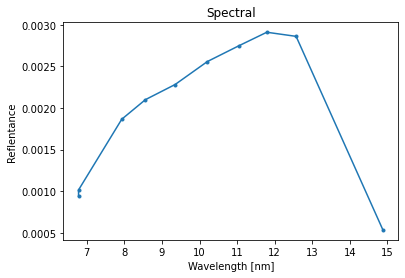

In [37]:
#移動平均、moving average
#成功, THEMIS
import numpy as np
import pandas as pd
import bottleneck as bn
import matplotlib.pyplot as plt
import csv
with open("I52359002SNU_ E_-73.31904  N_30.72080.csv", encoding='utf-8-sig') as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)#文字列をfloat型に変換
    l_f = [row for row in reader]
print(l_f)
print("\n")

l_f2 = np.array(l_f)#list型をNumPy配列に変換
print(l_f2)
print("\n")

n = int(l_f2.size/2)#要素数の半分を取得
print(n)
l_f3 = l_f2.reshape([n,2])#1行20列配列を10行2列配列に変換
print(l_f3)
print("\n")

l_f3_0 = l_f3[:,0]#1列目の全ての行を抽出, x
l_f3_1 = l_f3[:,1]#2列目の全ての行を抽出, y
print(l_f3_0)
print(l_f3_1)

plt.plot(l_f3_0, l_f3_1, marker=".", color="#1f77b4")
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflentance') 
plt.title('Spectral')
print("\n")

[       nan        nan        nan 0.00147972 0.00181546 0.00220144
 0.00242183 0.00262438 0.00276909 0.00226301]


Text(0.5, 1.0, 'Spectral Moving Average')

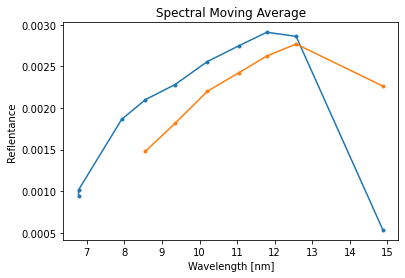

In [22]:
# def moving_average(x, w):   #x=np.array,w=width
#     return np.convolve(x, np.ones(w), 'valid') / w
# mv_data = moving_average(l_f3_1,4)
# print(mv_data)

def rollavg_bottlneck(a,n):
    return bn.move_mean(a, window=n, min_count = None)

mv_data = rollavg_bottlneck(l_f3_1, 4)#入力させる
print(mv_data)

plt.plot(l_f3_0, l_f3_1, marker=".", color="#1f77b4")
plt.plot(l_f3_0, mv_data, marker=".", color="#ff7f0e")
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflentance')
plt.title('Spectral Moving Average')